# Taller 6: Redes Nueronales

## Importar librerias

In [3]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

## Punto 1. Clasificación con redes neuronales - Datos iris

### Datos, Selección y División

Descarga Datos Iris

In [4]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Selección de Especimen

In [22]:
y = tf.keras.utils.to_categorical(iris.target, num_classes=3)
y_s = y[:,[0]]
y_s

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

División de datos (entrenamiento, validación, prueba)

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, y_s, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train.shape

(96, 4)

In [7]:
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[6.  3.  4.8 1.8]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]]
[[ 0.16110746 -0.23717928  0.58382847  0.77996804]
 [ 1.01358158 -0.01611898  0.52732894  0.3865691 ]
 [-0.44780262 -1.56354107 -0.03766635 -0.2690958 ]]


### Modelo Base

Creación del modelo base (capa de entrada, capa oculta con 8 neuronas y una capa de salida comn una neurona para la única categoria)

In [8]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
base = tf.keras.Sequential()
base.add(tf.keras.layers.InputLayer(input_shape=(4,)))
base.add(tf.keras.layers.Dense(8, activation="relu"))
base.add(tf.keras.layers.Dense(1, activation="softmax"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
base.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Entrenamiento del modelo base

In [11]:
history_base = base.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100


C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.3190 - loss: 0.7255 - val_accuracy: 0.3333 - val_loss: 0.7415
Epoch 2/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3125 - loss: 0.7233

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3190 - loss: 0.7064 - val_accuracy: 0.3333 - val_loss: 0.7262
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3190 - loss: 0.6883 - val_accuracy: 0.3333 - val_loss: 0.7117
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3190 - loss: 0.6711 - val_accuracy: 0.3333 - val_loss: 0.6980
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3190 - loss: 0.6549 - val_accuracy: 0.3333 - val_loss: 0.6852
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3190 - loss: 0.6395 - val_accuracy: 0.3333 - val_loss: 0.6732
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3190 - loss: 0.6249 - val_accuracy: 0.3333 - val_loss: 0.6616
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3190 - loss: 0.6109 - val_accuracy: 0.3333 - val_loss: 0.6504
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3190 - loss: 0.5974 - val_accuracy: 0.3333 - val_loss: 0.6397
Epoc

Grafica historial de pérdida de entrenamiento y validación

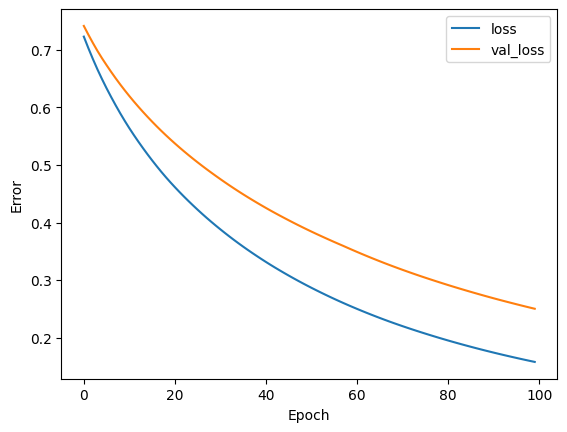

In [12]:
plt.plot(history_base.history['loss'], label='loss')
plt.plot(history_base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

Metricas

In [23]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred = base.predict(X_test)
#y_pred_classes = np.argmax(y_pred, axis=1)
#y_pred_classes
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 0.3333
Precision: 0.3333
Recall: 1.0000
F1 Score: 0.5000
F2 Score: 0.7143
ROC AUC Score: 0.5000


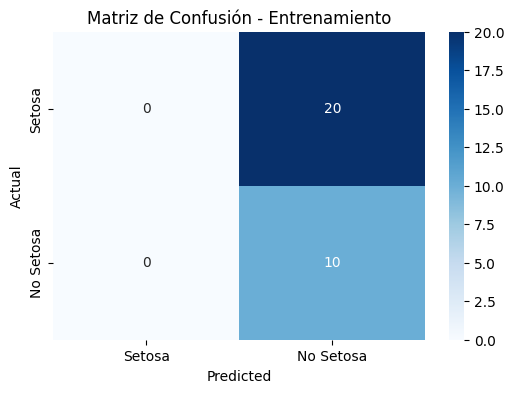

In [ ]:

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
roc_auc = roc_auc_score(y_test, y_pred)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['Setosa', 'No Setosa'], yticklabels= ['Setosa', 'No Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Entrenamiento')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
--- MÉTRICAS DEL MODELO (Validación) ---
Accuracy: 0.3333
Precision: 0.3333
Recall: 1.0000
F1 Score: 0.5000
F2 Score: 0.7143
ROC AUC Score: 0.5000


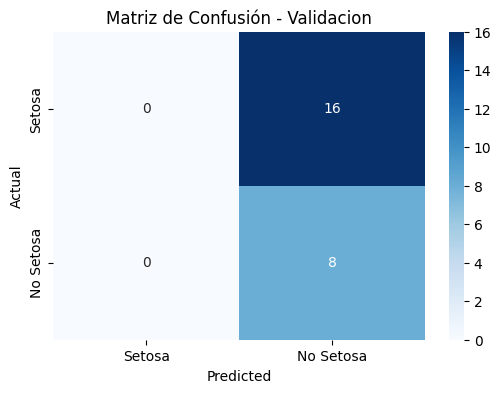

In [29]:

# Evaluación en conjunto de validación
y_pred_validation = base.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred_validation)
precision = precision_score(y_valid, y_pred_validation)
recall = recall_score(y_valid, y_pred_validation)
f1 = f1_score(y_valid, y_pred_validation)
f2 = fbeta_score(y_valid, y_pred_validation, beta=2)
roc_auc = roc_auc_score(y_valid, y_pred_validation)

print("--- MÉTRICAS DEL MODELO (Validación) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


# Matriz de confusión
conf_matrix = confusion_matrix(y_valid, y_pred_validation)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels =  ['Setosa', 'No Setosa'], yticklabels= ['Setosa', 'No Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Validacion')
plt.show()

